In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [17]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [20]:
# View all of the classes that automap found
measurement = Base.classes.measurement
station = Base.classes.station


In [23]:
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [24]:
for row in session.query(measurement).\
   group_by(func.strftime("%Y-%m", measurement.date)).\
      order_by(measurement.date.desc()).limit(12):
         print(row.date, row.prcp)   

2017-08-01 0.02
2017-07-01 0.02
2017-06-01 0.0
2017-05-01 0.26
2017-04-01 0.0
2017-03-01 1.19
2017-02-01 0.0
2017-01-01 0.0
2016-12-01 0.12
2016-11-01 0.0
2016-10-01 0.0
2016-09-01 0.0


In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

station_data = engine.execute("SELECT * FROM station;").fetchall()
station_df   = pd.DataFrame(station_data)

precip_data = engine.execute("SELECT * FROM measurement WHERE strftime('%Y-%m-%d',date) >= '2016-09-01';").fetchall()
precip_df = pd.DataFrame(precip_data)
precip_df['date'] = pd.to_datetime(precip_df['date'])

precip_df.set_index('date')

,id,station,prcp,tobs
date,,,,
2016-09-01,2373,USC00519397,0.00,81.0
2016-09-02,2374,USC00519397,0.00,80.0
2016-09-03,2375,USC00519397,0.00,79.0
2016-09-04,2376,USC00519397,0.03,75.0
2016-09-05,2377,USC00519397,NaN,79.0
...,...,...,...,...
2017-08-19,19546,USC00516128,0.09,71.0
2017-08-20,19547,USC00516128,NaN,78.0
2017-08-21,19548,USC00516128,0.56,76.0


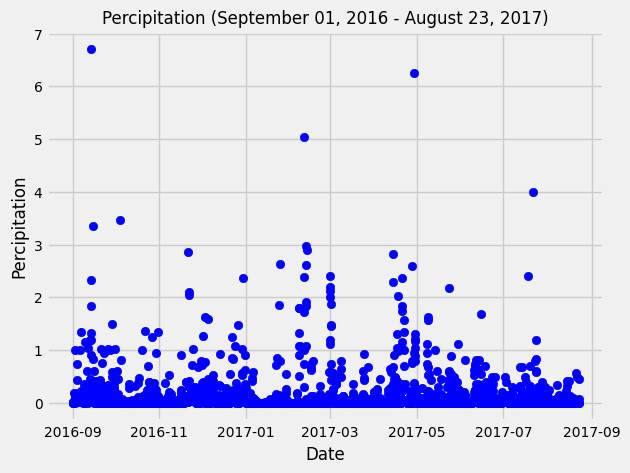

In [26]:
 # Use Pandas Plotting with Matplotlib to plot the data
x_values = precip_df['date']
y_values = precip_df['prcp']

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'blue')
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Percipitation', fontsize = 12)
plt.title('Percipitation (September 01, 2016 - August 23, 2017)', fontsize = 12)
#print(f"The r-squared is: {rvalue**2}")
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,id,prcp,tobs
count,2171.000000,1968.000000,2171.000000
mean,10167.722708,0.171479,74.494242
std,5609.254319,0.451817,4.617372
min,2373.000000,0.000000,58.000000
25%,5290.500000,0.000000,71.000000
50%,8934.000000,0.020000,75.000000
75%,14757.500000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
merged_df = precip_df.merge(station_df, on='station', how="left")
merged_df

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,2373,USC00519397,2016-09-01,0.00,81.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2374,USC00519397,2016-09-02,0.00,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2375,USC00519397,2016-09-03,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2376,USC00519397,2016-09-04,0.03,75.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2377,USC00519397,2016-09-05,NaN,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
2166,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2167,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2168,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2169,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
merged_df.groupby(['station', 'name'])['date'].nunique().sort_values(ascending=False)

station      name                                  
USC00519397  WAIKIKI 717.2, HI US                      352
USC00519281  WAIHEE 837.5, HI US                       343
USC00516128  MANOA LYON ARBO 785.2, HI US              341
USC00513117  KANEOHE 838.1, HI US                      334
USC00519523  WAIMANALO EXPERIMENTAL FARM, HI US        328
USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US    297
USC00517948  PEARL CITY, HI US                         176
Name: date, dtype: int64

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
waikiki = merged_df[merged_df['station'] == 'USC00519397']

waikiki.aggregate(lowest = ('prcp', 'min'),highest = ('prcp', 'max'),average = ('prcp', 'mean'))

,prcp
lowest,0.000000
highest,2.620000
average,0.045114


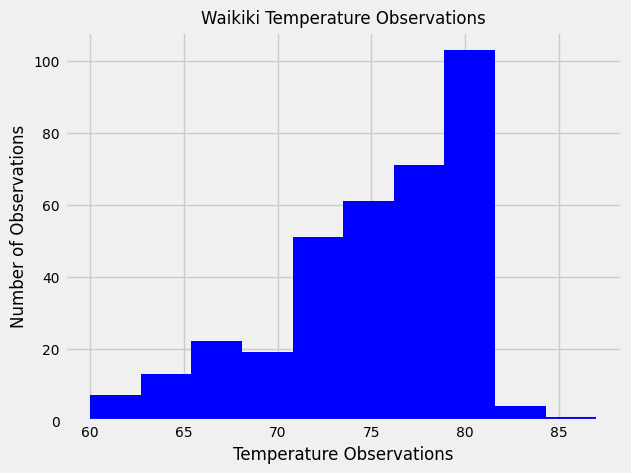

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# waikiki_tobs = waikiki[waikiki['tobs'] < 0.6183275]

N_points = len(waikiki.index)
n_bins = 10


plt.hist(waikiki.tobs, bins = n_bins, color='blue')
plt.xlabel('Temperature Observations', fontsize = 12)
plt.ylabel('Number of Observations', fontsize = 12)
plt.title('Waikiki Temperature Observations', fontsize = 12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()